In [128]:
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image

#Pranav Yalamala
#I pledge my honor that I have abided by the Stevens Honor System

In [129]:
#array to store all images converted to arrays
array = np.zeros((177,65536))

i = 0
for filename in os.listdir('face_data'):
    f = os.path.join('face_data', filename)
    if os.path.isfile(f):
        image = Image.open(f)
        data = np.asarray(image)
        data = np.reshape(data, 65536)
        array[i] = data
        i += 1

In [130]:
def print_face(image_arr):
    data = np.reshape(image_arr, (256,256))
    plt.imshow(data, cmap='gray')

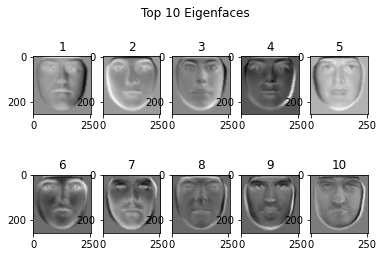

In [131]:
training_set = array[0:157]
test_set = array[157:177]

mean_image = np.zeros((1, 65536))
for image in training_set:
    mean_image += image
mean_image = mean_image / 157

avg_training_set = training_set - mean_image

cov = (avg_training_set @ avg_training_set.T) / 157
values, vectors = np.linalg.eig(cov)

vectors = vectors.T
sorted_indecies = values.argsort()
vectors = vectors[sorted_indecies[::-1]] #sorts vectors into decreasing order based on the decreasing order of indecies of the values
def EigenFaces(K):
    eigenfaces = np.zeros((K, 65536))
    i = 0
    for i in range(0, K):
        proj = avg_training_set.T @ vectors[i]
        eigenfaces[i] = proj / np.linalg.norm(proj)
        i += 1
    return eigenfaces
eigenfaces = EigenFaces(30)

for i in range(0, 10):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(np.reshape(eigenfaces[i], (256,256)), cmap='gray')
    ax.set_title(f'{i + 1}')
plt.suptitle('Top 10 Eigenfaces')
plt.show()

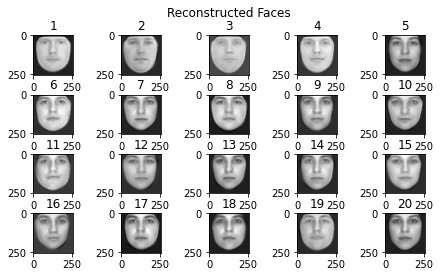

In [132]:
def reconstruct(eigenfaces):
    reconstructed_faces = np.zeros((len(test_set), 65536))
    avg_test = test_set - mean_image
    proj = avg_test @ eigenfaces.T
    reconstructed_faces = (proj @ eigenfaces) + mean_image
    return reconstructed_faces

reconstructed_faces = reconstruct(eigenfaces)

for i in range(0, len(reconstructed_faces)):
    ax = plt.subplot(4, 5, i+1)
    ax.imshow(np.reshape(reconstructed_faces[i], (256,256)), cmap='gray')
    ax.set_title(f'{i + 1}')
plt.subplots_adjust(left=.025, right=.975, wspace=.5, hspace=.5)
plt.suptitle('Reconstructed Faces')
plt.show()

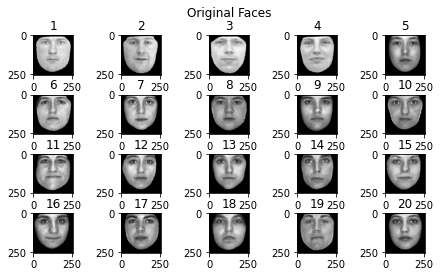

In [133]:
for i in range(0, len(test_set)):
    ax = plt.subplot(4, 5, i+1)
    ax.imshow(np.reshape(test_set[i], (256,256)), cmap='gray')
    ax.set_title(f'{i + 1}')
plt.subplots_adjust(left=.025, right=.975, wspace=.5, hspace=.5)
plt.suptitle('Original Faces')
plt.show()

In [134]:
def Error(original, reconstructed):
    return sum(sum(reconstructed - original)**2) / len(original)
error = Error(test_set, reconstructed_faces)
print(error)

23347157.38334145


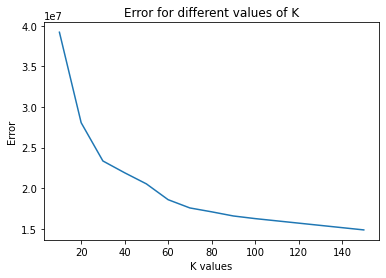

In [135]:
k_vals = np.array((10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150))
error_vals = np.zeros(len(k_vals))

for i in range(0, len(k_vals)):
    eigenfaces = EigenFaces(k_vals[i])
    reconstructed_faces = reconstruct(eigenfaces)
    error_vals[i] = Error(test_set, reconstructed_faces)
plt.plot(k_vals, error_vals)
plt.title("Error for different values of K")
plt.xlabel("K values")
plt.ylabel("Error")
plt.show()